In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr


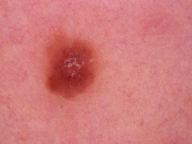

In [3]:
im = PILImage.create('1.jpg')
im.thumbnail((192,192))
im

In [4]:
learn = load_learner('model.pkl')

In [5]:
learn.predict(im)

('skin-cancer',
 tensor(5),
 tensor([2.0444e-05, 5.6786e-05, 5.5484e-08, 1.4728e-02, 1.1731e-05, 9.8518e-01]))

In [11]:
#|export
categories = ('Elephantiasis','Normal Leg','Normal Skin','Ringworm','Skin Acne', 'Skin Cancer')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories,map(float,probs)))


In [12]:
classify_image(im)

{'Elephantiasis': 2.0443720131879672e-05,
 'Normal Leg': 5.678594243363477e-05,
 'Normal Skin': 5.548396231347397e-08,
 'Ringworm': 0.014728409238159657,
 'Skin Acne': 1.1731368431355804e-05,
 'Skin Cancer': 0.9851825833320618}

In [13]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['1.jpg','2.jpg','3.jpg','4.jpg','5.jpg']

intf = gr.Interface(fn = classify_image,inputs = image,outputs = label,examples= examples)
intf.launch(inline=False)

/home/shivam/mambaforge/lib/python3.10/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/shivam/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/shivam/mambaforge/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/shivam/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [15]:
import nbdev
nbdev.export.nb_export('app.ipynb', 'app2.py')
print('Export successful')

Export successful


In [16]:
from nbdev.export import notebook2script
notebook2script()

ImportError: cannot import name 'notebook2script' from 'nbdev.export' (/home/shivam/mambaforge/lib/python3.10/site-packages/nbdev/export.py)